# Loading Data and Data Processing

There are different types of data that need to be loaded and processed.
1. Texts
  * CSV files
  * Human readable textual files
2. Images
3. Audio

Data may come from different sources:
1. Locally available data
2. URL of dataset
3. Available datasets from Tensorflow and Kaggle
4. Numpy and Pandas arrays

## Texts

### CSV files

#### Loading CSV files

In the following exercise, we see how data is obtained from a CSV file whose URL is known to us and loaded to Tensorflow


In the first approach, we will directly load the data from the URL.

In [1]:
import pandas as pd  # importing the pandas library

csv_data = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=[
        "Length",
        "Diameter",
        "Height",
        "Whole weight",
        "Shucked weight",
        "Viscera weight",
        "Shell weight",
        "Age",
    ],
)

Print the values of the data frame

In [2]:
csv_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.3340,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.8790,0.3740,0.1695,0.2300,13
...,...,...,...,...,...,...,...,...
3315,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950,15
3316,0.700,0.525,0.190,1.6015,0.7070,0.3650,0.4300,10
3317,0.530,0.420,0.130,0.8365,0.3745,0.1670,0.2490,11
3318,0.395,0.315,0.105,0.3515,0.1185,0.0910,0.1195,16


In the second approach, we will download the data to our disk and create a Pandas dataframe.

In [3]:
from tensorflow.keras import utils  # We use utils for downloading the data

url = "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv"

dataset_dir = utils.get_file(origin=url, cache_dir="./")

145915/145915 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Verify whether the file is downloaded. If the above download is complete, the data will be downloaded to the **datasets** directory in the current folder.

In [4]:
from os import listdir

files = list(listdir("./datasets"))
print(files)

['abalone_train.csv']


In [5]:
csv_data = pd.read_csv(
    "./datasets/abalone_train.csv",
    names=[
        "Length",
        "Diameter",
        "Height",
        "Whole weight",
        "Shucked weight",
        "Viscera weight",
        "Shell weight",
        "Age",
    ],
)

csv_data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.3340,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.8790,0.3740,0.1695,0.2300,13
...,...,...,...,...,...,...,...,...
3315,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950,15
3316,0.700,0.525,0.190,1.6015,0.7070,0.3650,0.4300,10
3317,0.530,0.420,0.130,0.8365,0.3745,0.1670,0.2490,11
3318,0.395,0.315,0.105,0.3515,0.1185,0.0910,0.1195,16


#### Preprocessing CSV files

Suppose that our goal is to predict the age from the other features. 

We will first see the unique values of Age.

In [19]:
print(csv_data["Age"].unique().sort())

None


Now we will create separate dataframe for features.

In [7]:
features = csv_data.copy()
labels = features.pop("Age")

In [8]:
features

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.435,0.335,0.110,0.3340,0.1355,0.0775,0.0965
1,0.585,0.450,0.125,0.8740,0.3545,0.2075,0.2250
2,0.655,0.510,0.160,1.0920,0.3960,0.2825,0.3700
3,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600
4,0.545,0.420,0.130,0.8790,0.3740,0.1695,0.2300
...,...,...,...,...,...,...,...
3315,0.605,0.475,0.180,0.9365,0.3940,0.2190,0.2950
3316,0.700,0.525,0.190,1.6015,0.7070,0.3650,0.4300
3317,0.530,0.420,0.130,0.8365,0.3745,0.1670,0.2490
3318,0.395,0.315,0.105,0.3515,0.1185,0.0910,0.1195


In [9]:
labels

0        7
1        6
2       14
3       16
4       13
        ..
3315    15
3316    10
3317    11
3318    16
3319    19
Name: Age, Length: 3320, dtype: int64

We see only numerical values in the features. We will now create a numpy array of these features.

In [10]:
import numpy as np

np_features = np.array(features)

print(np_features)

[[0.435  0.335  0.11   ... 0.1355 0.0775 0.0965]
 [0.585  0.45   0.125  ... 0.3545 0.2075 0.225 ]
 [0.655  0.51   0.16   ... 0.396  0.2825 0.37  ]
 ...
 [0.53   0.42   0.13   ... 0.3745 0.167  0.249 ]
 [0.395  0.315  0.105  ... 0.1185 0.091  0.1195]
 [0.45   0.355  0.12   ... 0.1145 0.0665 0.16  ]]


**Note** It is a good practice to normalize the data before training a tensorflow model.

We will use `Normalization` from `tensorflow` for this purpose. 
Note that the function `adopt` should be run only on the test data

In [11]:
from tensorflow.keras import layers

normalize = layers.Normalization()


normalize.adapt(np_features)

#### Using the data for training

Now we are ready to progress with the training.
We have the features and the labels ready.

In [12]:
### Building a model
import tensorflow as tf

model = tf.keras.Sequential(
    [
        normalize,  ## Note the use of Normalization layer
        layers.Dense(64),
        layers.Dense(1),
    ]
)

model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam())

In [13]:
## Starting the training

history = model.fit(np_features, labels, epochs=10)

Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 102.5202
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 68.8359
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 24.9574
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 6.5259
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 5.2636
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 4.8635
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 5.1264
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9231
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step - loss: 4.9266
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8826


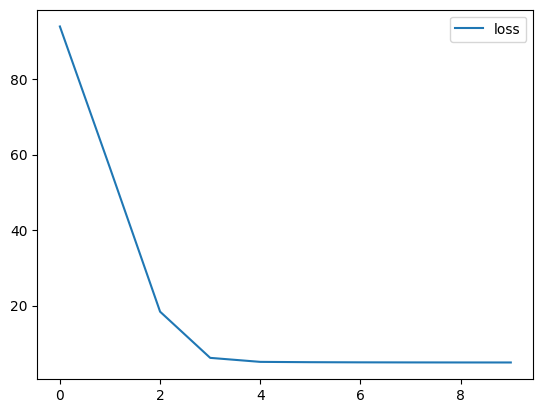

In [14]:
import matplotlib.pyplot as plt

metrics = history.history
plt.plot(history.epoch, metrics["loss"])
plt.legend(["loss"])
plt.show()

In [15]:
## Printing the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 7)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,748 (6.84 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 15 (64.00 B)

 Optimizer params: 1,156 (4.52 KB)

### Text files

Now we will focus on the text files.

We will use Stack Overflow dataset for this part.Note that this is a zipped .tar dataset.


In [16]:
## Download, unzip and untar the dataset

url = "https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset_dir = utils.get_file(
    origin=url, untar=True, cache_dir="./datasets", cache_subdir=""
)

6053168/6053168 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


We will now see the contents of the downloaded file(s).

In [17]:
from os import listdir

files = list(listdir("./datasets"))
print(files)

['abalone_train.csv', 'stack_overflow_16k.tar.gz', 'stack_overflow_16k.tar.gz_archive']


If the download is correctly done, we can see the `train` and `test` folders.

In [18]:
files = list(listdir("./datasets/train"))
print(files)

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: './datasets/train'

In [ ]:
files = list(listdir("./datasets/train/javascript"))
print(files[:5])  # print the name of first five files

In [ ]:
files = list(listdir("./datasets/test"))
print(files)

As we can see there are only two folders: `train` and `test`. It is a good practice to create datasets for training, validation and testing.

In the following code, we load the training data from the `train` folder and use 20% of the data for validation.

So far, we have loaded the complete data for training. We will now create batches of size 32.

In [ ]:
batch_size = 32
validation_size_percentage = 0.2  # To ensure 80:20 training:validation
seed = 40  # To ensure proper shuffiling

train_batch = utils.text_dataset_from_directory(
    "./datasets/train",
    batch_size=batch_size,
    validation_split=validation_size_percentage,
    subset="training",
    seed=seed,
)

We will now see the details of data: text and the associated label using the first batch.

In [ ]:
for text_batch, label_batch in train_batch.take(
    1
):  # Taking into consideration the first batch
    for i in range(batch_size):
        print(f"Label: {label_batch[i].numpy()} for the text: {text_batch[i].numpy()}")

But, you may have observed that the labels are not 
'csharp', 'python', 'java', 'javascript', but rather some numbers 0,1, 2, 3.

Now, we will display the associated class names.

In [ ]:
for i, label in enumerate(train_batch.class_names):
    print("Label", i, "corresponds to", label)

Now, we will create the validation dataset. 

Recall that we used the value 'training' for the parameter subset. This time we will use the value 'validation'.

In [ ]:
validation_batch = utils.text_dataset_from_directory(
    "./datasets/train",
    batch_size=batch_size,
    validation_split=validation_size_percentage,
    subset="validation",
    seed=seed,
)

And finally, we will create the test batch.

In [ ]:
test_batch = utils.text_dataset_from_directory("./datasets/test", batch_size=batch_size)

However, these datasets cannot be yet used for training, since we need vectors for working with Tensorflow. 

Our next goal is to convert the text data to associated vectors.

We will use two approaches:
1. Binary Vectorization (one-hot encoding)
2. 'int' Vectorization (integer indices for each token)

We will first start with **binary Vectorization**

In [ ]:
from tensorflow.keras.layers import TextVectorization

vocabulary_size = 10000

binary_vectorize_layer = TextVectorization(
    max_tokens=vocabulary_size, output_mode="binary"
)

In [ ]:
train_text = train_batch.map(lambda text, labels: text)
binary_vectorize_layer.adapt(train_text)

In [ ]:
for text_batch, label_batch in train_batch.take(1):
    for i in range(1):
        print("Text", text_batch[0].numpy())
        print("Label", label_batch[0].numpy())
        print("Binary Vectorization:")
        print(binary_vectorize_layer(text_batch[0]))  # One-hot encoding

The above output corresponds to one-hot encoding value of the text.

We will first start with **'int' Vectorization**

Unlike 'Binary' Vectorization, we also need the maximum sequence length.

Long texts will be truncated to this maximum length.

In [ ]:
from tensorflow.keras.layers import TextVectorization

vocabulary_size = 10000
max_sequence_length = 200

int_vectorize_layer = TextVectorization(
    max_tokens=vocabulary_size,
    output_sequence_length=max_sequence_length,
    output_mode="int",
)

In [ ]:
train_text = train_batch.map(lambda text, labels: text)
int_vectorize_layer.adapt(train_text)

In [ ]:
for text_batch, label_batch in train_batch.take(1):
    for i in range(1):
        print("Text", text_batch[0].numpy())
        print("Label", label_batch[0].numpy())
        print("Binary Vectorization:")
        print(int_vectorize_layer(text_batch[0]))  # Check the length of the sequence

To understand what the above sequence signify, we will look up in the vocabulary.

In [ ]:
for i in int_vectorize_layer(text_batch[0]):
    print(f"{i}: ", int_vectorize_layer.get_vocabulary()[i])

Now, we create functions to apply binary or 'int' vectorization to the dataset.

In [ ]:
def binary_vectorize(text, label):
    text = tf.expand_dims(text, -1)
    return binary_vectorize_layer(text), label

In [ ]:
def int_vectorize(text, label):
    text = tf.expand_dims(text, -1)
    return int_vectorize_layer(text), label

In [ ]:
binary_train_batch = train_batch.map(binary_vectorize)
binary_validation_batch = validation_batch.map(binary_vectorize)
binary_test_batch = test_batch.map(binary_vectorize)

In [ ]:
int_train_batch = train_batch.map(int_vectorize)
int_validation_batch = validation_batch.map(int_vectorize)
int_test_batch = test_batch.map(int_vectorize)

In [ ]:
# Training using binary 'Vectors'
from tensorflow.keras import losses

num_labels = 4
binary_model = tf.keras.Sequential([layers.Dense(num_labels)])

binary_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)

history = binary_model.fit(
    binary_train_batch, validation_data=binary_validation_batch, epochs=10
)

In [ ]:
print(binary_model.summary())

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics["loss"], metrics["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

In [ ]:
num_labels = 4
vocab_size = vocabulary_size + 1

int_model = tf.keras.Sequential(
    [
        layers.Embedding(vocab_size, 64, mask_zero=True),
        layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2),
        layers.GlobalMaxPooling1D(),
        layers.Dense(num_labels),
    ]
)

int_model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"],
)
history = int_model.fit(int_train_batch, validation_data=int_validation_batch, epochs=5)

In [ ]:
print(int_model.summary())

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics["loss"], metrics["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

In [ ]:
binary_loss, binary_accuracy = binary_model.evaluate(binary_test_batch)
int_loss, int_accuracy = int_model.evaluate(int_test_batch)

print("Binary model accuracy: {:2.2%}".format(binary_accuracy))
print("Int model accuracy: {:2.2%}".format(int_accuracy))

## Images

### Loading Image dataset

In [20]:
url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    origin=url, cache_dir="./datasets", cache_subdir="", untar=True
)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


We will now check the contents of the downloded data

In [21]:
from os import listdir

files = list(listdir("./datasets"))
print(files)

['abalone_train.csv', 'flower_photos.tgz', 'flower_photos.tgz_archive', 'stack_overflow_16k.tar.gz', 'stack_overflow_16k.tar.gz_archive']


In [38]:
import os
from pathlib import Path
print(os.getcwd())
files = list(listdir(Path(".","datasets","flower_photos.tgz")))
print(files)

c:\Users\CPE\Desktop\code\deep-learning\fr\Projet
['flower_photos']


#### Image data processing for building Tensorflow models

For the processing of images, we need the values of batch size and image size (height and weight).

In [39]:
batch_size = 32
img_height = 180
img_width = 180

For preparing the batch, we make use of `image_dataset_from_directory`. Note the parameter `image_size`. 

We will first create the training batch.

In [42]:
batch_size = 32
validation_size_percentage = 0.2  # To ensure 80:20 training:validation
seed = 40  # To ensure proper shuffiling

train_batch = utils.image_dataset_from_directory(
    Path(".","datasets","flower_photos.tgz"),
    batch_size=batch_size,
    validation_split=validation_size_percentage,
    subset="training",
    image_size=(img_height, img_width),
    seed=seed,
)

Found 3670 files belonging to 1 classes.
Using 2936 files for training.


Next, we will first create the validation batch.

In [43]:
validation_batch = utils.image_dataset_from_directory(
    Path(".","datasets","flower_photos.tgz"),
    batch_size=batch_size,
    validation_split=validation_size_percentage,
    subset="validation",
    image_size=(img_height, img_width),
    seed=seed,
)

Found 3670 files belonging to 1 classes.
Using 734 files for validation.


Let's see how the class names have been identified by Tensorflow.

In [44]:
class_names = train_batch.class_names
print(class_names)

['flower_photos']


Next, we will plot the images as well as their labels.

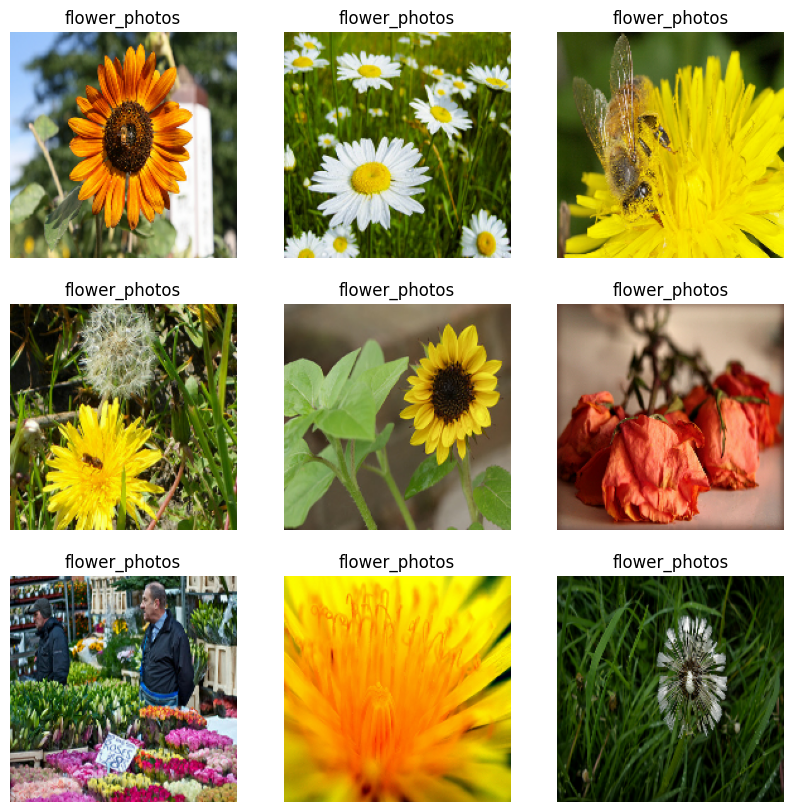

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_batch.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

We will now see the details of the first image from a batch: the shape of the image as well as the shape of the labels.

In [46]:
for images, labels in train_batch.take(1):
    print(images[0].shape)
    print(labels.shape)
    break

(180, 180, 3)
(32,)


As we have seen before, it is very important to normalize the images.

In [47]:
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

We now create the normalized batch.

In [48]:
normalized_batch = train_batch.map(lambda x, y: (normalization_layer(x), y))

Let's now see some information from an image of a normalized batch.

In [49]:
for images, labels in normalized_batch.take(1):
    print(np.min(images[0]), np.max(images[0]))

0.0 1.0


We will now build a Tensorflow model for the image classification.

We add a normalization later in this model.

In [50]:
num_classes = 5

model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1.0 / 255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(num_classes),
    ]
)

model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

We now perform the training of the model.

In [51]:
history = model.fit(train_batch, validation_data=validation_batch, epochs=3)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.9450 - loss: 0.0937 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 199ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [52]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,975,697 (18.98 MB)

 Trainable params: 1,658,565 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,317,132 (12.65 MB)

None


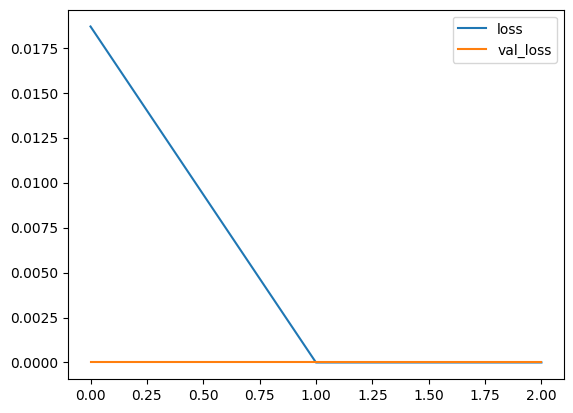

In [53]:
metrics = history.history
plt.plot(history.epoch, metrics["loss"], metrics["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

## Audio

### Loading Audio data

In [ ]:
url = "http://storage.googleapis.com/download.tensorflow.org/data/mini_speech_commands.zip"
data_dir = tf.keras.utils.get_file(
    origin=url, cache_dir="./datasets", cache_subdir="", extract=True
)

In [ ]:
from os import listdir

files = list(listdir("./datasets"))
print(files)

In [ ]:
files = list(listdir("./datasets/mini_speech_commands"))
commands = []
for c in files:
    if c != "README.md":
        commands.append(c)
print(commands)

In [ ]:
from glob import glob

filenames = glob("./datasets/mini_speech_commands/*/*")
filenames = tf.random.shuffle(filenames)
print(f"Number of examples: {len(filenames)}")

In [ ]:
train_files = filenames[:6400]
val_files = filenames[6400 : 6400 + 800]
test_files = filenames[-800:]

In [ ]:
test_file = tf.io.read_file(train_files[0])
test_audio, _ = tf.audio.decode_wav(contents=test_file)
test_audio.shape

In [ ]:
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(contents=audio_binary)
    return tf.squeeze(audio, axis=-1)

In [ ]:
import os


def get_label_from_filepath(file_path):

    parts = tf.strings.split(input=file_path, sep=os.path.sep)
    print(parts[-2])
    return parts[-2]

In [ ]:
t = get_label_from_filepath(train_files[0])
print(type(t))
print(t.numpy())

In [ ]:
def get_waveform_and_label(file_path):
    print(t.numpy())
    label = get_label_from_filepath(file_path)
    audio_binary = tf.io.read_file(file_path)
    waveform = decode_audio(audio_binary)
    return waveform, label

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

files_ds = tf.data.Dataset.from_tensor_slices(train_files)

waveform_ds = files_ds.map(map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 12))

for i, (audio, label) in enumerate(waveform_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    ax.plot(audio.numpy())
    ax.set_yticks(np.arange(-1.2, 1.2, 0.2))
    label = label.numpy().decode("utf-8")
    ax.set_title(label)

plt.show()

In [ ]:
def get_spectrogram(waveform):
    # Zero-padding for an audio waveform with less than 16,000 samples.
    input_len = 16000
    waveform = waveform[:input_len]
    zero_padding = tf.zeros([16000] - tf.shape(waveform), dtype=tf.float32)
    # Cast the waveform tensors' dtype to float32.
    waveform = tf.cast(waveform, dtype=tf.float32)
    # Concatenate the waveform with `zero_padding`, which ensures all audio
    # clips are of the same length.
    equal_length = tf.concat([waveform, zero_padding], 0)
    # Convert the waveform to a spectrogram via a STFT.
    spectrogram = tf.signal.stft(equal_length, frame_length=255, frame_step=128)
    # Obtain the magnitude of the STFT.
    spectrogram = tf.abs(spectrogram)
    # Add a `channels` dimension, so that the spectrogram can be used
    # as image-like input data with convolution layers (which expect
    # shape (`batch_size`, `height`, `width`, `channels`).
    spectrogram = spectrogram[..., tf.newaxis]
    return spectrogram

In [ ]:
from IPython import display

for waveform, label in waveform_ds.take(1):
    label = label.numpy().decode("utf-8")
    spectrogram = get_spectrogram(waveform)

print("Label:", label)
print("Waveform shape:", waveform.shape)
print("Spectrogram shape:", spectrogram.shape)
print("Audio playback")
display.display(display.Audio(waveform, rate=16000))

In [ ]:
def plot_spectrogram(spectrogram, ax):
    if len(spectrogram.shape) > 2:
        assert len(spectrogram.shape) == 3
        spectrogram = np.squeeze(spectrogram, axis=-1)
    # Convert the frequencies to log scale and transpose, so that the time is
    # represented on the x-axis (columns).
    # Add an epsilon to avoid taking a log of zero.
    log_spec = np.log(spectrogram.T + np.finfo(float).eps)
    height = log_spec.shape[0]
    width = log_spec.shape[1]
    X = np.linspace(0, np.size(spectrogram), num=width, dtype=int)
    Y = range(height)
    ax.pcolormesh(X, Y, log_spec, shading="auto")

In [ ]:
fig, axes = plt.subplots(2, figsize=(12, 8))
timescale = np.arange(waveform.shape[0])
axes[0].plot(timescale, waveform.numpy())
axes[0].set_title("Waveform")
axes[0].set_xlim([0, 16000])

plot_spectrogram(spectrogram.numpy(), axes[1])
axes[1].set_title("Spectrogram")
plt.show()

In [ ]:
def get_spectrogram_and_label_id(audio, label):
    spectrogram = get_spectrogram(audio)
    label_id = tf.argmax(label == commands)
    return spectrogram, label_id

In [ ]:
spectrogram_ds = waveform_ds.map(
    map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
)

In [ ]:
rows = 3
cols = 3
n = rows * cols
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

for i, (spectrogram, label_id) in enumerate(spectrogram_ds.take(n)):
    r = i // cols
    c = i % cols
    ax = axes[r][c]
    plot_spectrogram(spectrogram.numpy(), ax)
    ax.set_title(commands[label_id.numpy()])
    ax.axis("off")

plt.show()

In [ ]:
def preprocess_dataset(files):
    files_ds = tf.data.Dataset.from_tensor_slices(files)
    output_ds = files_ds.map(
        map_func=get_waveform_and_label, num_parallel_calls=AUTOTUNE
    )
    output_ds = output_ds.map(
        map_func=get_spectrogram_and_label_id, num_parallel_calls=AUTOTUNE
    )
    return output_ds

In [ ]:
train_ds = spectrogram_ds
val_ds = preprocess_dataset(val_files)
test_ds = preprocess_dataset(test_files)

In [ ]:
batch_size = 64
train_ds = train_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [ ]:
train_ds = train_ds.cache().prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)

In [ ]:
for spectrogram, _ in spectrogram_ds.take(1):
    input_shape = spectrogram.shape
print("Input shape:", input_shape)
num_labels = len(commands)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential(
    [
        layers.Input(shape=input_shape),
        # Downsample the input.
        layers.Resizing(32, 32),
        # Normalize.
        norm_layer,
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_labels),
    ]
)

model.summary()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [ ]:
EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics["loss"], metrics["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

In [ ]:
test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [ ]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f"Test set accuracy: {test_acc:.0%}")

In [ ]:
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx, xticklabels=commands, yticklabels=commands, annot=True, fmt="g"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()

### References
1. [Tensorflow: Load CSV data](https://www.tensorflow.org/tutorials/load_data/csv?hl=en)
2. [Tensorflow: Load text](https://www.tensorflow.org/tutorials/load_data/text?hl=en])
3. [tf.keras.utils.text_dataset_from_directory](https://www.tensorflow.org/api_docs/python/tf/keras/utils/text_dataset_from_directory)
4. [tf.keras.utils.get_file](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file)
5. [tf.keras.layers.TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)
6. [Load and preprocess images](https://www.tensorflow.org/tutorials/load_data/images?hl=en%5D)
7. [Simple audio recognition: Recognizing keywords](https://www.tensorflow.org/tutorials/audio/simple_audio)